In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading the dataset
df = pd.read_excel('Online Retail.xlsx')

In [3]:
# Display first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Display last 5 rows 
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
# rows and columns 
df.shape

(541909, 8)

In [6]:
# check data type of each column
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [7]:
# Check basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# Summary statistics
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [9]:
# Checking for duplicates
df.duplicated().sum()

5268

In [10]:
# Removing duplicates
df = df.drop_duplicates()

In [11]:
# Checking for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [12]:
# 135,080 rows out of 541,909 have null values in the CustomerID column.
# This means about 25% of CustomerID data is missing, which is significant.
# Dropping the CustomerID column
# This will reduces the dataset but ensures quality.

df = df.dropna(subset=['CustomerID'])

In [13]:
# Description column has 1,454 null values.
# 0.27% is very low, so it might not have a huge impact.
# Filling it with the most frequent description

df['Description'].fillna(df['Description'].mode()[0], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_31164\3076019398.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna(df['Description'].mode()[0], inplace=True)


In [14]:
# CustomerID is stored as float64, which is unnecessary. Converting it to int64
df['CustomerID'] = df['CustomerID'].astype('int64')

In [15]:
# Creating new column TotalSales for better analysis

df['TotalSales'] = df['Quantity'] * df['UnitPrice']

In [16]:
# Extracting Date Components from InvoiceDate

df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Weekday'] = df['InvoiceDate'].dt.day_name()
df['Hours'] = df['InvoiceDate'].dt.hour

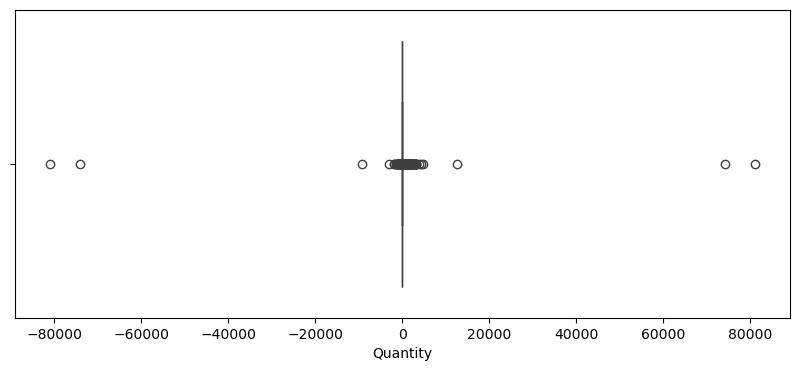

In [17]:
# Checking for Outliers in Quantity 
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Quantity'])  
plt.show()

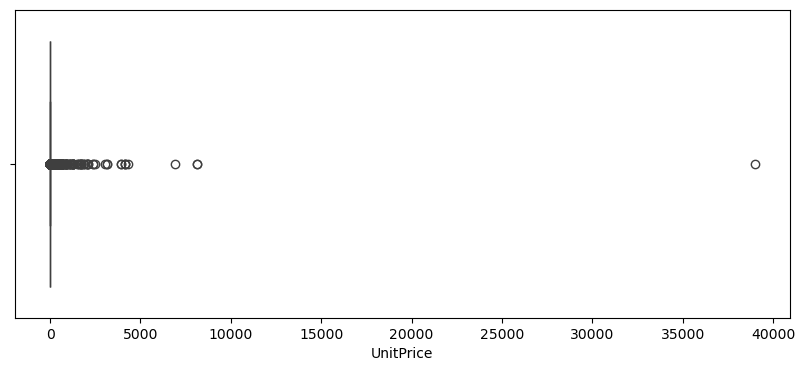

In [18]:
# Checking for Outliers in Price outliers
plt.figure(figsize=(10,4))
sns.boxplot(x=df['UnitPrice'])  
plt.show()

In [19]:
# Removing Outliers Using IQR (Interquartile Range)

Q1 = df[['Quantity', 'UnitPrice']].quantile(0.25)
Q3 = df[['Quantity', 'UnitPrice']].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[['Quantity', 'UnitPrice']] < (Q1 - 1.5 * IQR)) | (df[['Quantity', 'UnitPrice']] > (Q3 + 1.5 * IQR))).any(axis=1)]

### New and repeat customers

In [20]:
# Get the first purchase date for each customer
first_purchase = df.groupby('CustomerID')['InvoiceDate'].min().reset_index()
first_purchase.rename(columns={'InvoiceDate': 'FirstPurchaseDate'}, inplace=True)

# Merge with the original dataset
df = df.merge(first_purchase, on='CustomerID', how='left')

# Create a new column: "New" if first purchase, otherwise "Repeat"
df['CustomerType'] = df.apply(lambda x: 'New' if x['InvoiceDate'] == x['FirstPurchaseDate'] else 'Repeat', axis=1)

# Display the first few rows
print(df[['CustomerID', 'InvoiceDate', 'FirstPurchaseDate', 'CustomerType']].head())

   CustomerID         InvoiceDate   FirstPurchaseDate CustomerType
0       17850 2010-12-01 08:26:00 2010-12-01 08:26:00          New
1       17850 2010-12-01 08:26:00 2010-12-01 08:26:00          New
2       17850 2010-12-01 08:26:00 2010-12-01 08:26:00          New
3       17850 2010-12-01 08:26:00 2010-12-01 08:26:00          New
4       17850 2010-12-01 08:26:00 2010-12-01 08:26:00          New


### Average Time Between Purchases

In [21]:
# Calculate time difference between purchases
df['PrevPurchaseDate'] = df.sort_values(['CustomerID', 'InvoiceDate']).groupby('CustomerID')['InvoiceDate'].shift(1)
df['DaysBetween'] = (df['InvoiceDate'] - df['PrevPurchaseDate']).dt.days

In [22]:
# Average days between purchases (for repeat customers)
avg_days_between = df[df['DaysBetween'].notna()]['DaysBetween'].mean()
print(f"Average Days Between Purchases: {avg_days_between:.2f}")

Average Days Between Purchases: 1.63


###  Recency, Frequency, Monetary (RFM) Analysis

In [23]:
# Defining reference date (latest transaction date)
reference_date = df['InvoiceDate'].max()

In [24]:
# Group by customer and calculate RFM values
rfm = df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (reference_date - x.max()).days),
    Frequency=('InvoiceDate', 'count'),
    Monetary=('TotalSales', 'sum')
).reset_index()

In [25]:
# Display RFM values
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12347,1,166,3314.73
1,12348,248,6,90.20
2,12349,18,58,999.15
3,12350,309,16,294.40
4,12352,35,73,1010.61


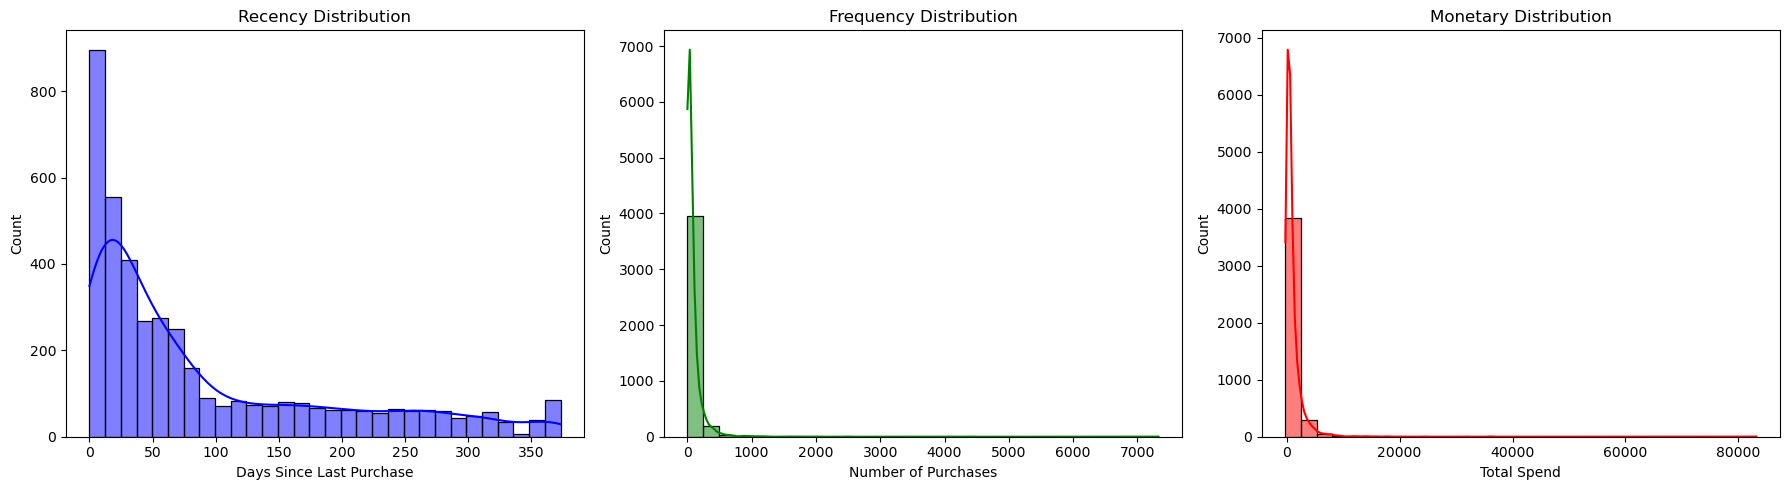

In [26]:
# Set figure size
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency distribution
sns.histplot(rfm['Recency'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Days Since Last Purchase')

# Frequency distribution
sns.histplot(rfm['Frequency'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Number of Purchases')

# Monetary distribution
sns.histplot(rfm['Monetary'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Total Spend')

plt.tight_layout()
plt.show()

### Customer Purchase Journey

In [27]:
customer_journey = df.groupby('CustomerID').agg(
    FirstPurchase=('InvoiceDate', 'min'),
    LastPurchase=('InvoiceDate', 'max'),
    TotalPurchases=('CustomerID', 'count'),
    TotalSpent=('TotalSales', 'sum')
).reset_index()

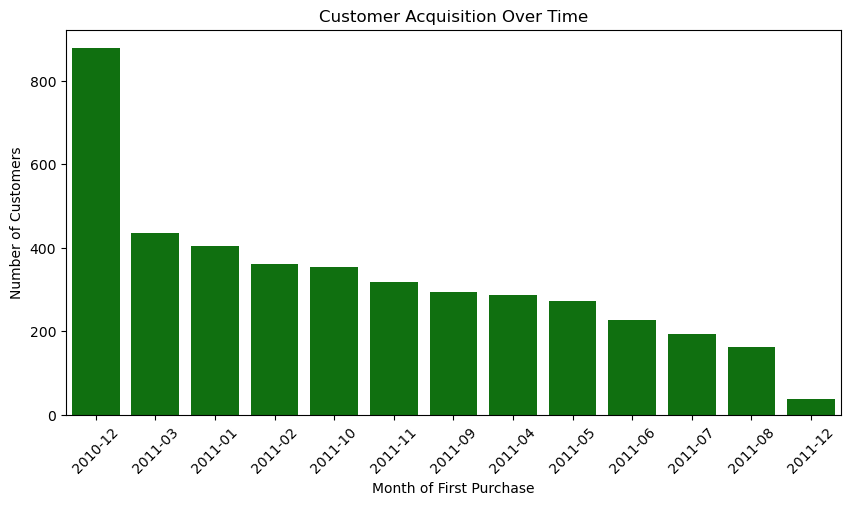

In [28]:
customer_journey['FirstPurchaseMonth'] = customer_journey['FirstPurchase'].dt.to_period('M')

plt.figure(figsize=(10, 5))
sns.countplot(data=customer_journey, x='FirstPurchaseMonth', order=customer_journey['FirstPurchaseMonth'].value_counts().index, color='green')
plt.xticks(rotation=45)
plt.title('Customer Acquisition Over Time')
plt.xlabel('Month of First Purchase')
plt.ylabel('Number of Customers')
plt.show()


In [29]:
# Count new and repeat customers per month
customer_counts = df.groupby(['Month', 'CustomerType'])['CustomerID'].nunique().reset_index()

# Pivot for better visualization
customer_counts_pivot = customer_counts.pivot(index='Month', columns='CustomerType', values='CustomerID').fillna(0)

customer_counts_pivot

CustomerType,New,Repeat
Month,,
1,403,412
2,362,432
3,434,592
4,287,600
5,272,802
6,227,800
7,193,766
8,163,778
9,293,983


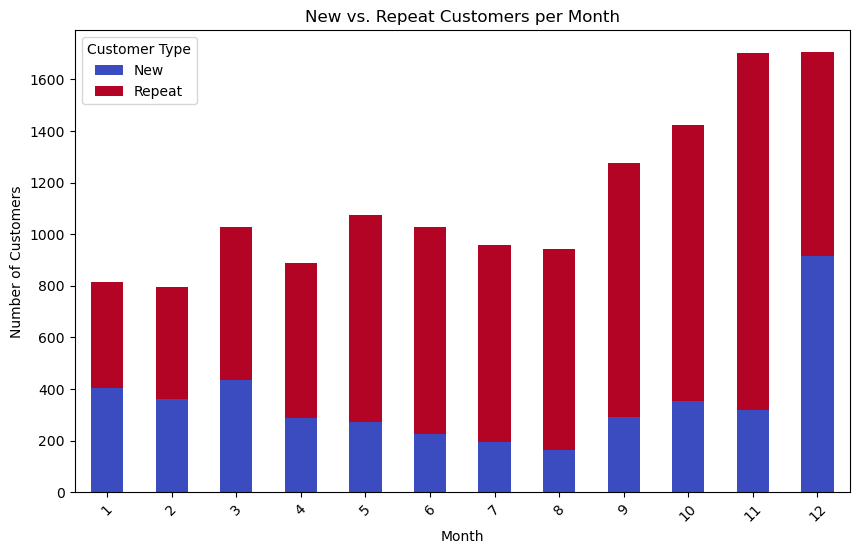

In [30]:
# Plot stacked bar chart
customer_counts_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

plt.title('New vs. Repeat Customers per Month')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.legend(title="Customer Type")
plt.xticks(rotation=45)
plt.show()

### Customer Retention Analysis

In [31]:
# Identify repeat customers
repeat_customers = df[df['CustomerType'] == 'Repeat']['CustomerID'].nunique()
repeat_customers

2869

In [32]:
total_customers = df['CustomerID'].nunique()
total_customers

4222

In [35]:
# Identify one-time customers (customers who purchased only once)
one_time_customers = df['CustomerID'].value_counts()[df['CustomerID'].value_counts() == 1].count()

In [36]:
# Calculate retention rate
retention_rate = (repeat_customers / total_customers) * 100
print(f"Customer Retention Rate: {retention_rate:.2f}%")

Customer Retention Rate: 67.95%


### Churn Rate (Customers Who Never Returned)

In [ ]:
# Customers who purchased only once
one_time_customers = df['CustomerID'].value_counts()[df['CustomerID'].value_counts() == 1].count()
churn_rate = (one_time_customers / total_customers) * 100
print(f"Churn Rate: {churn_rate:.2f}%")

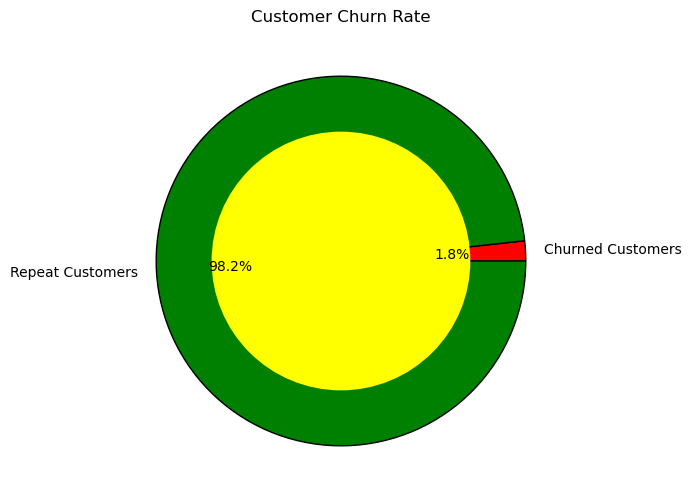

In [40]:
# Calculate repeat customers
repeat_customers = total_customers - one_time_customers

# Plotting 
labels = ['Churned Customers', 'Repeat Customers']
sizes = [one_time_customers, repeat_customers]
colors = ['red', 'green']

# Create pie chart (donut style)
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, wedgeprops={'edgecolor': 'black'})
plt.gca().add_artist(plt.Circle((0, 0), 0.7, fc='Yellow'))  # Donut hole

plt.title('Customer Churn Rate')
plt.show()

### Customer Lifetime Value (LTV)

In [41]:
# Calculate total revenue per customer
customer_revenue = df.groupby('CustomerID')['TotalSales'].sum()

In [42]:
# Average revenue per customer
average_ltv = customer_revenue.mean()
print(f"Average Customer Lifetime Value (LTV): ₹{average_ltv:.2f}")

Average Customer Lifetime Value (LTV): ₹1006.79


### Monthly Cohort Analysis (Track Customer Behavior Over Time)

In [43]:
# Create a cohort table
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
df['PurchaseMonth'] = df['InvoiceDate'].dt.to_period('M')

In [44]:
# Count unique customers per cohort and month
cohort_table = df.groupby(['CohortMonth', 'PurchaseMonth'])['CustomerID'].nunique().unstack().fillna(0)
print(cohort_table)

PurchaseMonth  2010-12  2011-01  2011-02  2011-03  2011-04  2011-05  2011-06  \
CohortMonth                                                                    
2010-12          878.0    327.0    282.0    328.0    308.0    348.0    333.0   
2011-01            0.0    403.0     90.0    112.0     97.0    129.0    120.0   
2011-02            0.0      0.0    362.0     83.0     65.0    100.0     96.0   
2011-03            0.0      0.0      0.0    434.0     75.0    111.0     95.0   
2011-04            0.0      0.0      0.0      0.0    287.0     62.0     61.0   
2011-05            0.0      0.0      0.0      0.0      0.0    272.0     57.0   
2011-06            0.0      0.0      0.0      0.0      0.0      0.0    227.0   
2011-07            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2011-08            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2011-09            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2011-10            0.0      0.0      0.0

### Customer Segmentation (K-Means Clustering)

In [45]:
# Select RFM features
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Scale the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12347,1,166,3314.73,0
1,12348,248,6,90.20,1
2,12349,18,58,999.15,0
3,12350,309,16,294.40,1
4,12352,35,73,1010.61,0


In [46]:
# Saving clean dataset
df.to_csv('Online_Retail_Cleaned.csv')

In [47]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Month,Day,Weekday,Hours,FirstPurchaseDate,CustomerType,PrevPurchaseDate,DaysBetween,CohortMonth,PurchaseMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,Wednesday,8,2010-12-01 08:26:00,New,NaT,NaN,2010-12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,Wednesday,8,2010-12-01 08:26:00,New,2010-12-01 08:26:00,0.0,2010-12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,Wednesday,8,2010-12-01 08:26:00,New,2010-12-01 08:26:00,0.0,2010-12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,Wednesday,8,2010-12-01 08:26:00,New,2010-12-01 08:26:00,0.0,2010-12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,Wednesday,8,2010-12-01 08:26:00,New,2010-12-01 08:26:00,0.0,2010-12,2010-12


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339453 entries, 0 to 339452
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          339453 non-null  object        
 1   StockCode          339453 non-null  object        
 2   Description        339453 non-null  object        
 3   Quantity           339453 non-null  int64         
 4   InvoiceDate        339453 non-null  datetime64[ns]
 5   UnitPrice          339453 non-null  float64       
 6   CustomerID         339453 non-null  int64         
 7   Country            339453 non-null  object        
 8   TotalSales         339453 non-null  float64       
 9   Year               339453 non-null  int32         
 10  Month              339453 non-null  int32         
 11  Day                339453 non-null  int32         
 12  Weekday            339453 non-null  object        
 13  Hours              339453 non-null  int32   